# 3 - Machine Learning (ML)
*Processo de criação, treino, avaliação e validação de modelos*

![Data Preparation](./img/imagem3.jpg "Preparação dos dados")

Objetivo passa por criar um modelo preditivo que aprenda as relações entre os dados de entrada (features) e a variável alvo (Life expectancy) 

--- 

## 3.1 - Bibliotecas Utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge




---
## 2.2 - Dataset Treino

In [ ]:

df_cleaned = pd.read_csv('./data/Life_Expectancy_Clean.csv')

## 3.2 - Preparar os Dados (Divisão do Dataset)


In [ ]:
from sklearn.model_selection import train_test_split

# Divisão do DataFrame em variáveis independentes (X) e dependentes (y)
# "Life expectancy" é a variável alvo
X = df_cleaned.drop(columns=["Life expectancy"])
y = df_cleaned["Life expectancy"]

# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def split_data_message():
    
    message = """
    * X: Contém as variáveis independentes do dataset (todas exceto 'Life expectancy').
    * y: Contém apenas a variável dependente ('Life expectancy').

    Divide os dados de forma aleatória, com 80% para treino e 20% para teste.
    """
    print(message)

# Chamar a função para exibir a mensagem
split_data_message()

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste
train, test = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos de treino e teste
train_shape = train.shape
test_shape = test.shape

print(f"Conjunto de Treino: {train_shape[0]} linhas, {train_shape[1]} colunas")
print(f"Conjunto de Teste: {test_shape[0]} linhas, {test_shape[1]} colunas")


---

## 3.3 - Treinar o Modelo

In [ ]:
# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df_cleaned.drop(columns=["Life expectancy"])
y = df_cleaned["Life expectancy"]

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Divisão do DataFrame em variáveis independentes (X) e dependentes (y)
# X: Contém as variáveis independentes do dataset (todas exceto 'Life expectancy').
# y: Contém apenas a variável dependente ('Life expectancy').

X = df_cleaned.drop(columns=["Life expectancy"])
y = df_cleaned["Life expectancy"]

# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Métricas para Regressão

* MAE (Mean Absolute Error):
Mede a média da diferença entre o valor real com o predito

* MSE (Mean Squared Error):
Calcula a média de diferença entre o valor predito com o real

* R² Score:
Representa o percentual da variância dos dados que é explicado pelo modelo.

In [ ]:
# Treinar e avaliar modelos
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    """
    Treina e avalia um modelo com métricas comuns de regressão.
    
    Parâmetros:
    - model: Instância do modelo.
    - model_name: Nome do modelo (str).
    - X_train, y_train: Dados de treino.
    - X_test, y_test: Dados de teste.
    
    Retorno:
    - Dicionário com os resultados de avaliação.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
    }

In [ ]:
# Lista de modelos a serem avaliados
models = [
    (MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42), "Deep Learning (MLPRegressor)"),
    (GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting Machine (GBM)"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Distributed Random Forest (DRF)"),
    (Ridge(alpha=1.0, random_state=42), "Generalized Linear Model (GLM)"),
]

In [ ]:
# Avaliar todos os modelos
results = []
for model, name in models:
    results.append(train_and_evaluate(model, name, X_train, y_train, X_test, y_test))

# Exibir os resultados como DataFrame para facilitar a comparação
results_df = pd.DataFrame(results)
print("Resultados Obtidos:")
print(results_df)

* Distributed Random Forest (DRF)

In [ ]:

# Treinar o modelo
model_drf = RandomForestRegressor(n_estimators=100, random_state=42)
model_drf.fit(X_train, y_train)

# Fazer previsões
y_pred_drf = model_drf.predict(X_test)

# Avaliar o desempenho
mae_drf = mean_absolute_error(y_test, y_pred_drf)
mse_drf = mean_squared_error(y_test, y_pred_drf)
r2_drf = r2_score(y_test, y_pred_drf)

# Exibir métricas
print("Avaliação do Modelo: Distributed Random Forest")
print(f"MAE: {mae_drf:.2f}")
print(f"MSE: {mse_drf:.2f}")
print(f"R²: {r2_drf:.2f}")

# Gráfico: Valores reais vs. previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_drf, alpha=0.7, color="blue", label="Previsões")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Linha Perfeita")
plt.title("Valores Reais vs. Previstos - Distributed Random Forest")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.show()



--- 

# 3.4 - Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida?

Impacto dos fatores socioeconómicos:
MAE: 2.40, MSE: 12.65, R²: 0.82


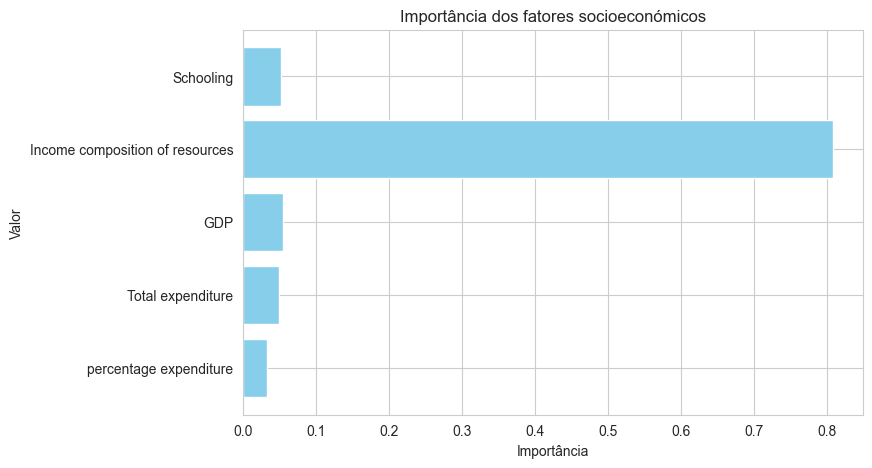

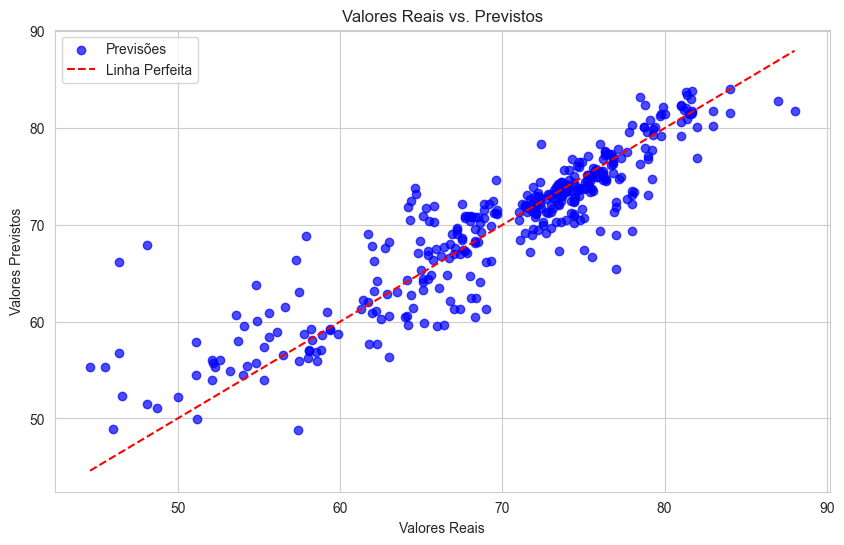

In [71]:
# Definir as variáveis independentes (Taxas de vacinação)
Train = X_train[['percentage expenditure', 'Total expenditure', 'GDP', 'Income composition of resources', 'Schooling']]
Target = y_train

# Testar no conjunto de teste
Test = X_test[['percentage expenditure', 'Total expenditure', 'GDP', 'Income composition of resources', 'Schooling']]
Test_Target = y_test

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(Train, Target)

# Fazer previsões
y_pred = model.predict(Test)

# Avaliar o desempenho
mae = mean_absolute_error(Test_Target, y_pred)
mse = mean_squared_error(Test_Target, y_pred)
r2 = r2_score(Test_Target, y_pred)

print("Impacto dos fatores socioeconómicos:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Importância das Variáveis
feature_importance = model.feature_importances_
features = Train.columns

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.title("Importância dos fatores socioeconómicos")
plt.xlabel("Importância")
plt.ylabel("Valor")
plt.show()

# Gráfico de Valores Reais vs. Previstos
plt.figure(figsize=(10, 6))
plt.scatter(Test_Target, y_pred, alpha=0.7, color="blue", label="Previsões")
plt.plot([min(Test_Target), max(Test_Target)], [min(Test_Target), max(Test_Target)], '--', color='red', label="Linha Perfeita")
plt.title("Valores Reais vs. Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.show()

--- 

# 3.5 - Qual o Impacto das Taxas de Vacinação na Mortalidade Infantil e Expectativa de Vida?

Impacto das Taxas de Vacinação:
MAE: 5.44, MSE: 55.12, R²: 0.20


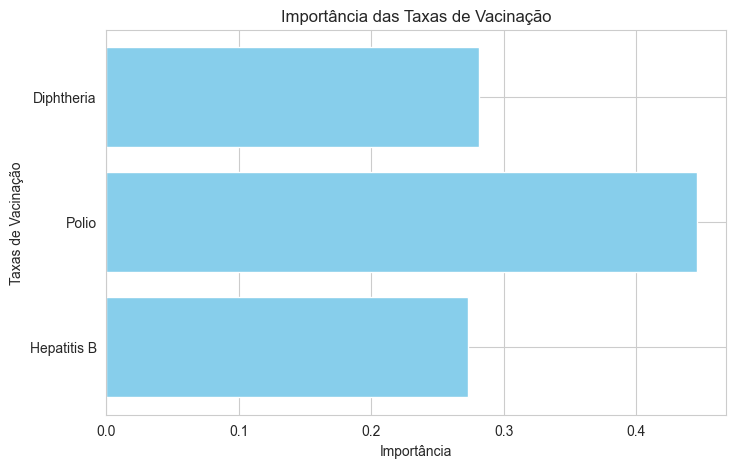

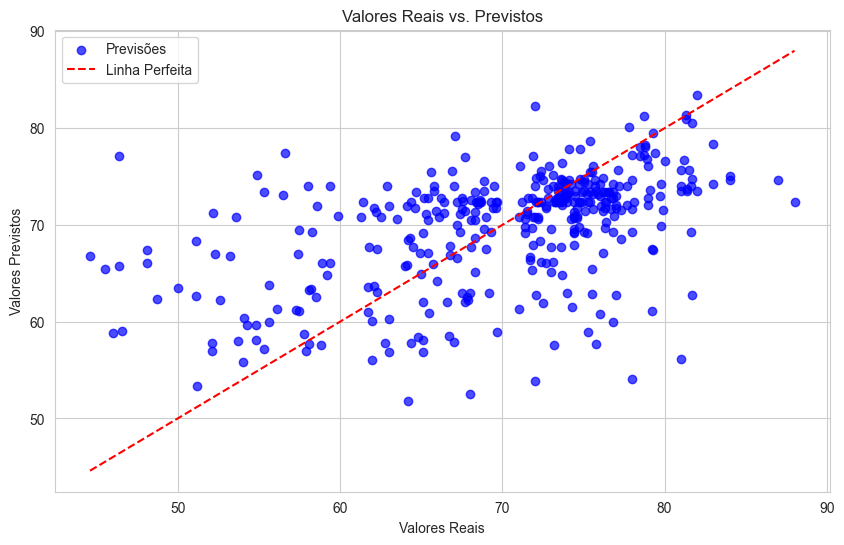

In [ ]:

# Definir as variáveis independentes (Taxas de vacinação)
Train = X_train[['Hepatitis B', 'Polio', 'Diphtheria']]
Target = y_train

# Testar no conjunto de teste
Test = X_test[['Hepatitis B', 'Polio', 'Diphtheria']]
Test_Target = y_test

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(Train, Target)

# Fazer previsões
y_pred = model.predict(Test)

# Avaliar o desempenho
mae = mean_absolute_error(Test_Target, y_pred)
mse = mean_squared_error(Test_Target, y_pred)
r2 = r2_score(Test_Target, y_pred)

print("Impacto das Taxas de Vacinação:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Importância das Variáveis
feature_importance = model.feature_importances_
features = Train.columns

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.title("Importância das Taxas de Vacinação")
plt.xlabel("Importância")
plt.ylabel("Taxas de Vacinação")
plt.show()

# Gráfico de Valores Reais vs. Previstos
plt.figure(figsize=(10, 6))
plt.scatter(Test_Target, y_pred, alpha=0.7, color="blue", label="Previsões")
plt.plot([min(Test_Target), max(Test_Target)], [min(Test_Target), max(Test_Target)], '--', color='red', label="Linha Perfeita")
plt.title("Valores Reais vs. Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.show()




## 3.4 - Guardar dataset_Treino


In [78]:
# Salvar o dataset limpo após o modelo ter sido treinado
output_path_cleaned_trained = './data/Life_Expectancy_Treino.csv'
df_cleaned.to_csv(output_path_cleaned_trained, index=False)

# Exibir o caminho do arquivo salvo
output_path_cleaned_trained



'./data/Life_Expectancy_Treino.csv'

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Suponha que o modelo esteja treinado
model = GradientBoostingRegressor()
# Treine o modelo e salve-o
joblib.dump(model, "life_expectancy_model.pkl")


## 3.5 - Treino com H2o

In [ ]:
# Importar Bibliotecas
import h2o
h2o.init()

In [ ]:
#Dataset

data = h2o.import_file("./data/Life_Expectancy_Clean.csv")
print(data.columns)

In [ ]:
# Preparar os Dados:

target = "Life expectancy"
predictors = data.columns
predictors.remove(target)
data[target] = data[target]

In [ ]:
#Dividir os Dados em Treino e Teste

train, test = data.split_frame([0.75], seed=42)

In [ ]:
#Modelo Base (Distributed Random Forest):

from h2o.estimators import H2ORandomForestEstimator
model_default = H2ORandomForestEstimator(seed=42)
model_default.train(x=predictors, y=target, training_frame=train)

In [ ]:
# Avaliar o Modelo

performance_default = model_default.model_performance(test)
print(performance_default)


In [ ]:
#Treinar Modelos com Configurações Diferentes:

model_alt1 = H2ORandomForestEstimator(ntrees=100, max_depth=20, seed=42)
model_alt1.train(x=predictors, y=target, training_frame=train)

model_alt2 = H2ORandomForestEstimator(ntrees=150, max_depth=30, seed=42)
model_alt2.train(x=predictors, y=target, training_frame=train)


In [ ]:
# Comparação dos Modelos:

performance_alt1 = model_alt1.model_performance(test)
performance_alt2 = model_alt2.model_performance(test)
print(performance_alt1)
print(performance_alt2)
